# Detecting objects with the Single Shot Detection (SSD) model

In this recipe, you will learn how to detect objects using the **Single Shot Detection (SSD)** approach with the pretrained MobileNet network. The model supports 20 classes and can be used in many computer vision applications where finding objects in a scene is required, such as vehiclecollision warning. To know more visit https://arxiv.org/abs/1512.02325.

In this recipe, we used the SSD approach for vehicle detection, which uses MobileNet as a backbone network. The model was pretrained by the MS COCO dataset and supports a lot of generic classes, such as person, car, and bird. 

In the code, we specified the minimal level of confidence required to consider detection successful (`CONF_THR=0.3`). 

In [1]:
# Import all of the necessary modules
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os

%matplotlib auto
%pylab inline


def print_image(header,name,np_arr,start_First=0, end_First=1, start_Second=0, end_Second=2,start_3=0, end_3=5):
    print("------  {0:-<25}    Shape{1} {2}: {3:}".format(header, np_arr.shape, name, str(np_arr.dtype)) )
    shapes = np_arr.shape #print(shapes)
    if shapes[0] < end_First:
        end_First = shapes[0]
    if shapes[1] < end_Second:
        end_Second = shapes[1]
    if len(shapes)==3:
        if shapes[2] < end_3:
            end_3 = shapes[2]
    if len(shapes)==3:
        for i in range (start_First,end_First):
            print("[", sep='',end="")
            for j in range (start_Second,end_Second):
                print(np_arr[i,j,start_3:end_3], sep=' ', end=" ")
            print(']')
    if len(shapes)==2:
        for i in range (start_First,end_First):
            print("[", end=" ")
            #print(np_arr[i,start_Second:end_Second],sep=' ',end=" ") cutoff sting by<60
            for k in range (start_Second,end_Second):
                print(np_arr[i,k], end=" ")
            print(']')
def plt_view_image(plt,list_images,figsize=(15,6), axis="off", cmap='gray'):
    #%pylab inline
    plt.figure(figsize=figsize)
    n = len(list_images)  #; print(n)
    plot_number = 1
    for name, img in list_images:
        plt.subplot(1,n,plot_number)
        plt.axis(axis)
        plt.title(name)
        if cmap =='gray':
            plt.imshow(img,cmap='gray' )
        else:
            plt.imshow(img )
        plot_number = plot_number + 1
    plt.show()
#help("modules")   
import sys             
print('\n'.join(sys.path))
print("current folder ==",os.getcwd())
#pip list"

Using matplotlib backend: TkAgg
Populating the interactive namespace from numpy and matplotlib
D:\HTML_DOC\Program\opencv\Packt\S05\env
C:\Program Files\Python38\python38.zip
C:\Program Files\Python38\DLLs
C:\Program Files\Python38\lib
C:\Program Files\Python38
d:\html_doc\program\opencv\packt\s05\env

d:\html_doc\program\opencv\packt\s05\env\lib\site-packages
d:\html_doc\program\opencv\packt\s05\env\lib\site-packages\pip-20.0.2-py3.8.egg
d:\html_doc\program\opencv\packt\s05\env\lib\site-packages\win32
d:\html_doc\program\opencv\packt\s05\env\lib\site-packages\win32\lib
d:\html_doc\program\opencv\packt\s05\env\lib\site-packages\Pythonwin
d:\html_doc\program\opencv\packt\s05\env\lib\site-packages\IPython\extensions
C:\Users\polit\.ipython
current folder == D:\HTML_DOC\Program\opencv\Packt\S05\env


In [2]:
model = cv2.dnn.readNetFromCaffe('../data/MobileNetSSD_deploy.prototxt',
                                 '../data/MobileNetSSD_deploy.caffemodel')

In [3]:
CONF_THR = 0.3
LABELS = {1: 'aeroplane', 2: 'bicycle', 3: 'bird', 4: 'boat',
          5: 'bottle', 6: 'bus', 7: 'car', 8: 'cat', 9: 'chair',
          10: 'cow', 11: 'diningtable', 12: 'dog', 13: 'horse',
          14: 'motorbike', 15: 'person', 16: 'pottedplant',
          17: 'sheep', 18: 'sofa', 19: 'train', 20: 'tvmonitor'}

True
Created capture: ../data/traffic.mp4
Frame count: 1501
Frame width: 1920
Frame height: 1080
Frame rate: 25.0
len(bvlc_googlenet.caffemodel) == 11


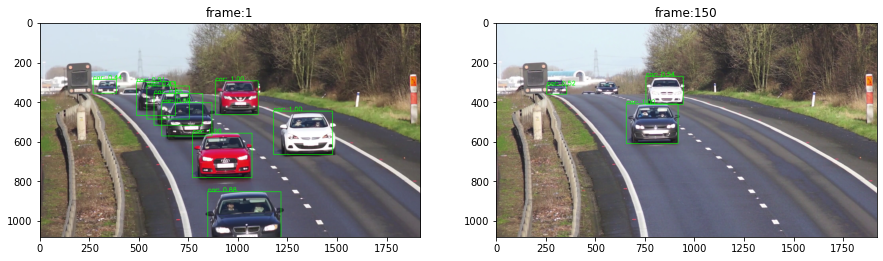

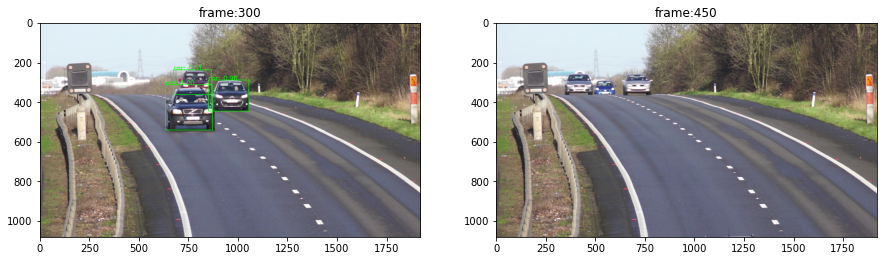

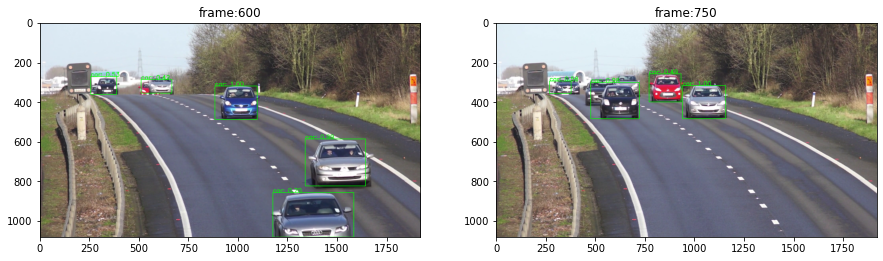

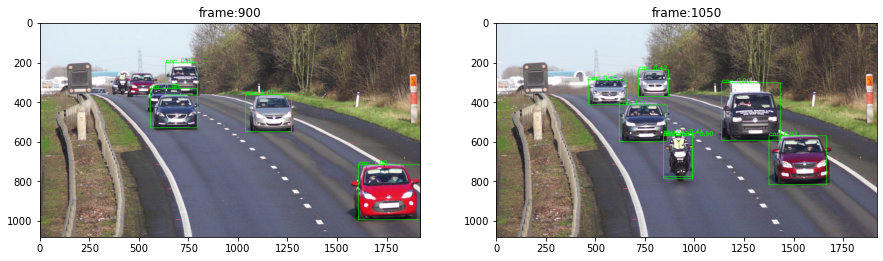

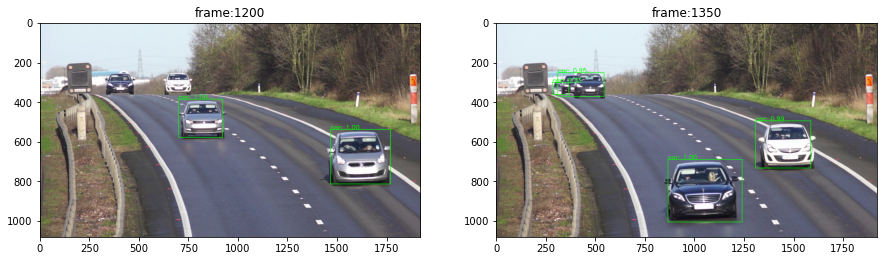

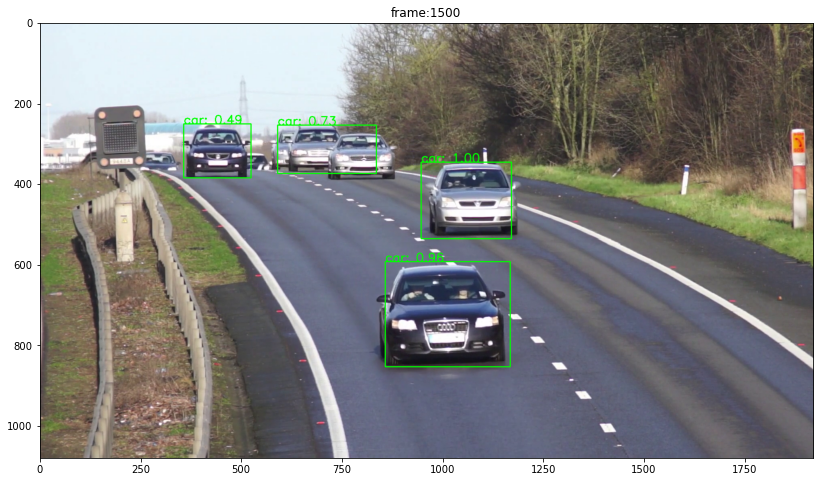

In [4]:
capture = cv2.VideoCapture('../data/traffic.mp4')
print(capture.isOpened())
print('Created capture:', '../data/traffic.mp4')
print('Frame count:', int(capture.get(cv2.CAP_PROP_FRAME_COUNT)))
print('Frame width:', int(capture.get(cv2.CAP_PROP_FRAME_WIDTH)))
print('Frame height:', int(capture.get(cv2.CAP_PROP_FRAME_HEIGHT)))
print('Frame rate:', capture.get(cv2.CAP_PROP_FPS))


image_frames = []

c=0
while True:
    ret, frame = capture.read()
    if not ret: break
        
    h, w = frame.shape[0:2]
    blob = cv2.dnn.blobFromImage(frame, 1/127.5, (300*w//h,300), (127.5,127.5,127.5), False)
    model.setInput(blob)
    output = model.forward()
    
    for i in range(output.shape[2]):
        conf = output[0,0,i,2]
        if conf > CONF_THR:
            label = output[0,0,i,1]
            x0,y0,x1,y1 = (output[0,0,i,3:7] * [w,h,w,h]).astype(int)
            cv2.rectangle(frame, (x0,y0), (x1,y1), (0,255,0), 2)
            cv2.putText(frame, '{}: {:.2f}'.format(LABELS[label], conf), 
                        (x0,y0), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255,0), 2)
    
    c += 1
    if c == 100:
        cv2.imwrite('ch5_car_detections.png', frame)
    if c % 150 == 0 or c ==1:
        image_frames.append(["frame:{0}".format(c),frame[:,:,[2,1,0]]])
    
    cv2.imshow('frame', frame)
    key = cv2.waitKey(3)
    if key == 27: break
        
cv2.destroyAllWindows()

#########################################################
print("len(bvlc_googlenet.caffemodel) ==", len(image_frames))
k =2
for i in range(0,len(image_frames),k):
    plt_view_image(plt,image_frames[i:i+k], figsize=(15,8), axis='on', cmap='gray')